Do `Kernel -> Restart & Run All` in top menu to run the notebook and enable the interactive widgets

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi as pi

from IPython.display import display
from ipywidgets import interact

In [3]:
def get_disc_cos(A, f, phi, N):
    """Create N samples of discrete cosine function.

    A: amplitude
    f: frequency
    phi: initial phase
    N: number of samples to compute
    """
    n = np.arange(N)
    cos_n = A * np.cos(2 * np.pi * f * n + phi)
    return n, cos_n

def get_cont_cos(A, f, phi, N, n_points = 1000):
    """Create a continuous cosine function 
    corresponding to a discrete cosine of N samples
    (just to make the visualisation of the discrete
    cosine nicer)

    A: amplitude
    f: frequency
    phi: initial phase
    N: number of samples of the corresponding discrete cosine
    n_points: number of points for interpolation 
              of the continuous function
    """
    t = np.linspace(0, N, n_points)
    cos_t = A * np.cos(2 * np.pi * f * t + phi)
    return t, cos_t
    


<IPython.core.display.Javascript object>


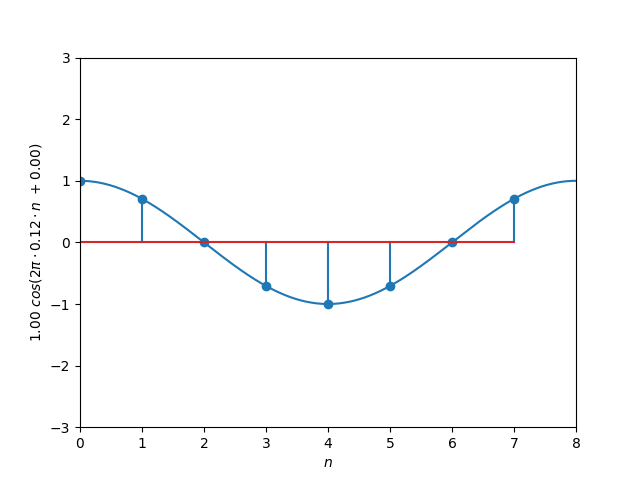

interactive(children=(FloatSlider(value=1.0, description='A', max=3.0), FloatSlider(value=0.125, description='…

In [4]:
N = 8 # number of samples to plot

# set the plot
fig, ax = plt.subplots(1)
ax.set_xlim([0,8])
ax.set_ylim([-3,3])

# plot some initial cosine
# just to get the handles to the plots
x, cos_x = get_cont_cos(1, 1/8.0, 0, N)
n, cos_n = get_disc_cos(1, 1/8.0, 0, N)
cont_cos_plot, = ax.plot(x, cos_x)
ml, sl, bl = ax.stem(n, cos_n)

# wrapper for interactive mode
def plot_cos(A = 1, f = 1/8.0, phi = 0):
    x, cos_x = get_cont_cos(A, f, phi, N)
    n, cos_n = get_disc_cos(A, f, phi, N)
    
    # plot the continuous cosine
    cont_cos_plot.set_data(x, cos_x)
    
    # plot the discrete cosine
    # (clumsy but fast way to do so by
    # setting the position of markerline
    # and stemlines in the stem plot)
    ml.set_data(n, cos_n)
    for i_l, l in enumerate(sl):
        l.set_data(np.stack((n,n)).T[i_l], 
                   np.stack((np.zeros((N,)), cos_n)).T[i_l])
    
    ax.set_xlabel('$n$')
    ax.set_ylabel('${0:.2f}\ cos(2\pi\cdot{1:.2f}\cdot n\ {2:+.2f})$'.format(A,f,phi))
    
    plt.draw()

interact(plot_cos, 
                 A = (0,3,0.1), 
                 f = (0,8/8,1/32), 
                 phi = (-pi, pi, pi/8))

plt.show()